carry out EDA
check for missing values
check for outliers
univariate non graphical and graphicals
bivariate and multivariate
scaling and preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as np
import seaborn as sns


def load_data():
    path = r"C:\Users\ibrom\Documents\SAMPLE DATASET\Iris_Data.csv"
    read_path = pd.read_csv(path)
    return read_path

iris = load_data()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#checking for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No missing values here, we are good to go

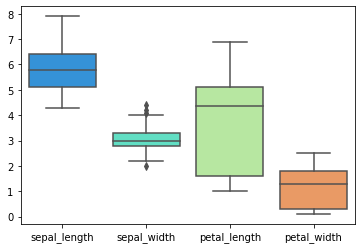

In [6]:
#checking for outliers with boxplot
sns.boxplot(data = iris, palette = 'rainbow')

we have no outliers except for the sepal width

In [7]:
#univariate analysis for the categorical data
import researchpy as rp
cat = rp.summary_cat(iris['species'])
cat

,Variable,Outcome,Count,Percent
0,species,Iris-setosa,50,33.33
1,,Iris-virginica,50,33.33
2,,Iris-versicolor,50,33.33


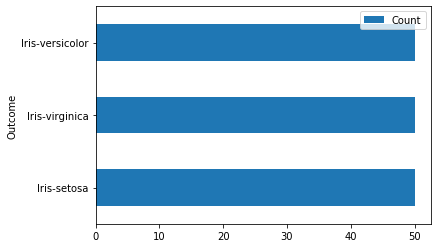

In [9]:
#let's visualize this
cat.plot.barh('Outcome', 'Count')

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
rp.summary_cont(iris['sepal_length'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sepal_length,150.0,5.843333,0.828066,0.067611,5.709732,5.976934


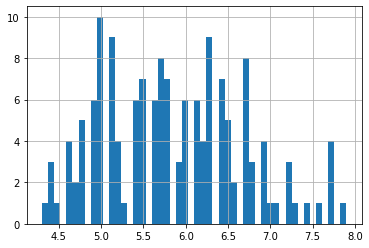

In [19]:
iris['sepal_length'].hist(bins = 50)

In [21]:
rp.summary_cont(iris['sepal_width'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sepal_width,150.0,3.054,0.433594,0.035403,2.984044,3.123956


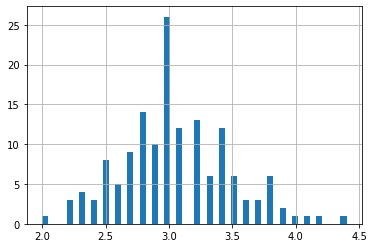

In [22]:
iris['sepal_width'].hist(bins = 50)

In [24]:
rp.summary_cont(iris['petal_length'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,petal_length,150.0,3.758667,1.76442,0.144064,3.473994,4.04334


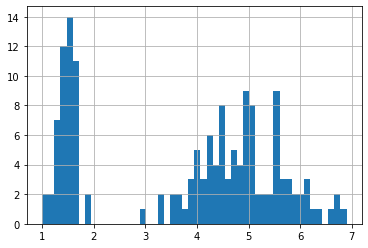

In [27]:
iris['petal_length'].hist(bins = 50)

Something doesn't look right here.

In [28]:
rp.summary_cont(iris['petal_width'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,petal_width,150.0,1.198667,0.763161,0.062312,1.075538,1.321796


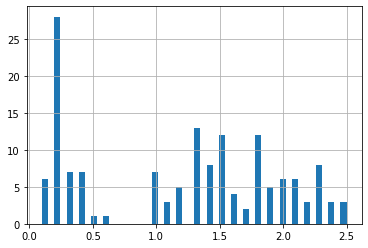

In [29]:
iris['petal_width'].hist(bins = 50)

Now let's do explore the relationship between sepal length and petal length as well as sepal width and petal width

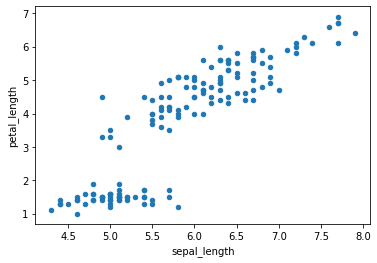

In [31]:
iris.plot.scatter('sepal_length', 'petal_length')

there seem to be some sort of relationship between these two

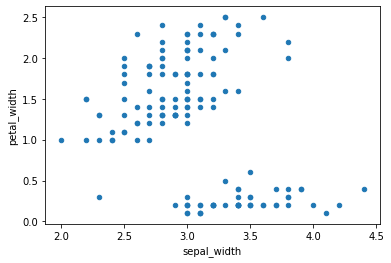

In [32]:
iris.plot.scatter('sepal_width', 'petal_width')

these two are fighting with each other

Let's see how they are all correlated

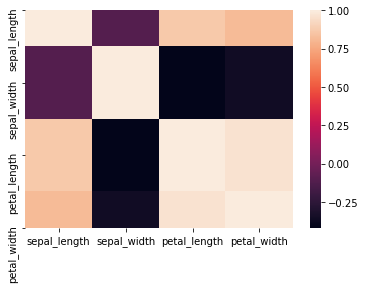

In [34]:
sns.heatmap(iris.corr())

Let's take this a bit further

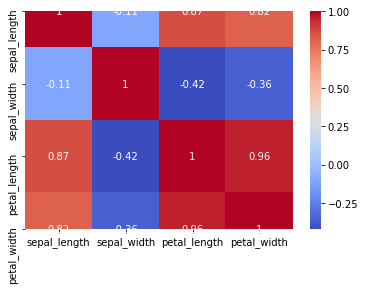

In [35]:
sns.heatmap(iris.corr(), cmap = 'coolwarm', annot = True)

This is pretty nice. petal length & sepal length, petal width & sepal lenght and petal width & spetal length shows
a high degree of correlation.

Okay! It's time for modelling

In [36]:
#Splitting our data into features and labels
iris_dummy = pd.get_dummies(iris)
feature = iris.iloc[:, 0:4]
label = iris['species']
X = feature.values
y = label.values

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 200)

Let's start small

In [38]:

#training without preprocessing
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

C:\Users\ibrom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ibrom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [39]:
#model evaluation
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [40]:
#let's see what happens with preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.54      0.70        13
 Iris-virginica       0.60      1.00      0.75         9

       accuracy                           0.84        38
      macro avg       0.87      0.85      0.82        38
   weighted avg       0.91      0.84      0.84        38



C:\Users\ibrom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ibrom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


the model performed better when preprocessing was not applied

In [41]:
#let's try another algorithm
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



Wow! the model performed exellently well using Gradient boosting

Lol! somebody said we should work on some real life data rather than predicting a flower set. 
Wait for it... we are coming to that...